In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

activities_file_name = os.path.join("activities.csv")
activities_file_name

plt.style.use("classic")
plt.figure(figsize=(7.5, 4.25))

# Data cleanup
activities = pd.read_csv(activities_file_name, index_col=0)
activities.rename(columns={'Activity Date': 'activity_date', 'Activity Type': 'activity_type', 'Elapsed Time': 'elapsed_time'}, inplace=True)
activities["Distance"] = pd.to_numeric(activities["Distance"], errors="coerce")
activities['activity_date'] = pd.to_datetime(activities['activity_date'], format="%b %d, %Y, %I:%M:%S %p")

# Convert seconds to hours
activities["time_in_hours"] = activities['elapsed_time'].div(3600)

# Organising by date

def get_activities_by_date(from_year, from_month, from_day, to_year, to_month, to_day):
    from_date = pd.Timestamp(from_year, from_month, from_day)
    to_date = pd.Timestamp(to_year, to_month, to_day)
    index_date_filter = (activities['activity_date'] > from_date) & (activities['activity_date'] < to_date)
    filtered_activities = activities[index_date_filter]
    return filtered_activities

def create_bar_chart_activity_durations(dataset, title):
    grouped_activities = dataset.groupby("activity_type")
    totals = grouped_activities.sum()
    totals['time_in_hours'].sort_values(ascending=False).plot(kind="bar")
    plt.title("{}".format(title), fontsize=12)
    plt.xlabel("Activity Type", fontsize=10)
    plt.ylabel("Time (hrs)", fontsize=10)
    plt.savefig("{}.pdf".format(title))
    plt.show()



<Figure size 600x340 with 0 Axes>

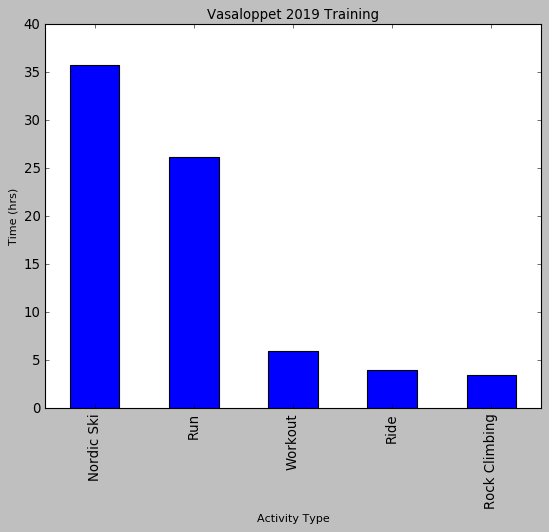

In [14]:
create_bar_chart_activity_durations(get_activities_by_date(2018, 9, 1, 2019, 2, 28), "Vasaloppet 2019 Training")
